In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
# 빨간 warning message를 보고싶지 않다면
import warnings
warnings.filterwarnings('ignore')

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

참고로, 저희는 데이터셋을 가져와서 원본은 따로 저장을 해두고, 복사한 데이터셋을 사용합니다. 꼭 이렇게 해야만 하는 것은 아니지만, 데이터를 다루다보면 데이터셋을 종종 바꾸는 일이 있기 때문에 원본 데이터셋은 따로 저장해두는 습관을 가지는 것이 좋습니다.

In [7]:
data = sns.load_dataset("tips")
tips = data
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [12]:
# TIP 비율 컬럼 추가
tips['tip_rate'] = round(tips["tip"] / tips["total_bill"] * 100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


### 데이터 셋 뜯어보기
#### (1) 웨이터의 성별

In [13]:
# 웨이터의 성별 값 확인하기
tips.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

위 결과는 Series의 데이터 자료형으로 표현된 것입니다. Series 자료형이란, pandas에서 컬럼이 단 한 개인 데이터셋을 다루는 자료형입니다. 위 형태를 여러 개의 컬럼을 가진 pandas의 DataFrame으로 보고싶다면 reset_index를 활용해서 index를 만들어 주면 됩니다.

In [16]:
# 성별을 pandas DataFrame 형식으로 보기
sex_count = tips.groupby('sex').size().reset_index(name = "counts")
sex_count

,sex,counts
0,Male,157
1,Female,87


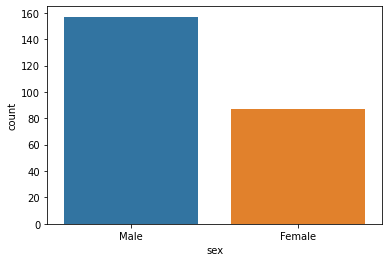

In [17]:
# 그래프로 성별 확인해 보기
sns.countplot(data = tips, x = 'sex')
plt.show()

In [19]:
# 정확한 비율 알아보기
print("Male   ", "{:.1f}%".format(sex_count.loc[0, "counts"] / len(tips) * 100))
print("Female ", "{:.1f}%".format(sex_count.loc[1, "counts"] / len(tips) * 100))

Male    64.3%
Female  35.7%


#### (2) smoker : 손님의 흡연 여부

In [20]:
tips.groupby('smoker').size().reset_index(name = "counts")

,smoker,counts
0,Yes,93
1,No,151


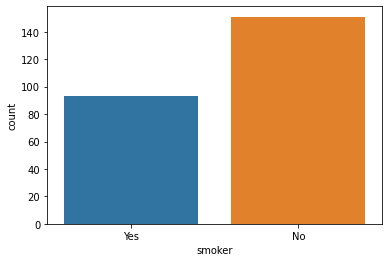

In [21]:
# data 시각화 해보기
sns.countplot(data = tips, x = "smoker")
plt.show()

#### (3) day, time : 요일 시간

이번에는 day와 time 별로 데이터 확인

여러 값이 있는 데이터를 살펴보는 것은 pivot_table을 활용하면 간단함.
pivot_table에서 데이터의 개수를 세기 위해 counts라는 컬럼을 만들어 주자

In [22]:
# counts 컬럼에 동일하게 1 값을 넣어주기
tips['counts'] = 1
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1


In [23]:
# index는 time 으로, columns는 day로 설정하여 피봇 테이블 만들기
tips.pivot_table('counts', index = 'time', columns = 'day', aggfunc = 'sum')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


빈 값으로 나타난 것은 데이터가 없기 때문임. 0으로 채워주고, 데이터 또한 정수형으로 바꾸어 주자.
특히, 피벗 테이블의 마지막에 총합 행과 열을 추가하고 싶으면 margins =True를 넣어주면 됨

In [26]:
# 빈 값은 0으로 채워주고 정수형으로 형 변환해주기
tips.pivot_table("counts", index = "time", columns = "day", aggfunc = 'sum', margins = True).fillna(0).astype('int64')

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61,7,0,0,68
Dinner,1,12,87,76,176
All,62,19,87,76,244


In [27]:
# 금요일 비율 확인하기
(19 / 244) * 100

7.786885245901639

약 7.8%밖에 안되는 데이터만 존재하는군요.

그래프로도 확인을 해보죠.

그래프로도 확인을 해보죠. time별로 확인하고 싶다면 hue라는 파라미터에 "time"을 입력해주면 됩니다.

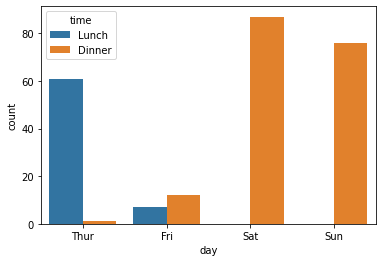

In [28]:
# 그래프로 시각화 해보기
sns.countplot(data = tips, x = 'day', hue = 'time')
plt.show()

지금까지 알아본 것을 정리하면 다음과 같습니다.

- **요일day**
목, 금, 토, 일의 데이터만 존재하며, 특히 금요일은 전체 데이터의 약 7.8%의 매우 적은 데이터만 있다.
또한, 요일의 종류로 본다면 평일이 목/금 이틀, 주말이 토/일 이틀로 구분할 수 있다.

- **시간time**
런치와 디너 두 가지의 데이터를 가진다.
그러나 런치는 목, 금요일에만 데이터가 있고, 토, 일 즉 주말에는 런치에 대한 데이터가 없고, 평일 디너의 데이터 개수는 매우 적다.
따라서 시간으로 데이터를 분석할 때, **런치는 모두 평일 데이터이며, 디너는 주로 주말의 데이터**라는 점을 고려해야 한다.

#### (4) size : 데이터 인원 수

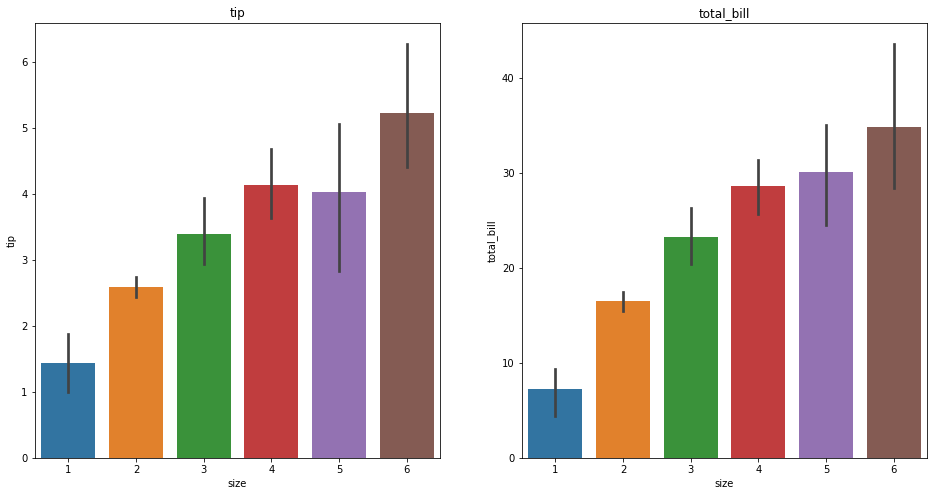

In [30]:
# subplot 사용하여 1개 행, 2개 열로 두가지 컬럼 동시에 시각화 하기
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.barplot(data = tips, x= "size", y = "tip")
plt.title('tip')

plt.subplot(122)
sns.barplot(data = tips, x = "size", y = "total_bill")
plt.title('total_bill')

plt.show()

잠깐! 여기서 그래프의 색상을 바꿀 수 있는 방법을 소개합니다.    
    
seaborn은 다양한 color palette를 제공하므로, 원하는 것을 골라서 사용할 수 있습니다. 
- https://seaborn.pydata.org/generated/seaborn.color_palette.html    


여기에서 다양한 컬러 팔레트를 확인하고, 원하는 팔레트를 골라서 사용하세요!

In [33]:
sns.set_palette("Set2")
# sns.set_palette("Paired")
#sns.set_palette("husl")

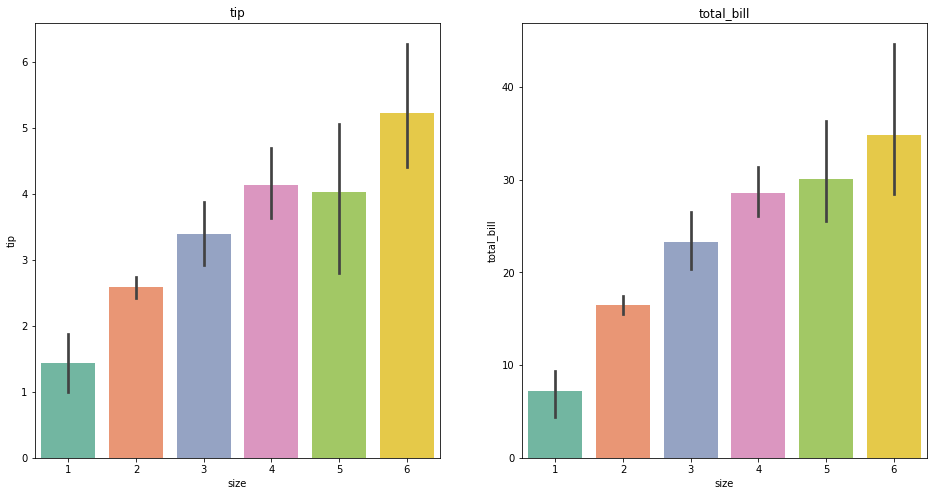

In [32]:
# subplot 사용하여 1개 행, 2개 열로 두가지 컬럼 동시에 시각화 하기
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.barplot(data = tips, x= "size", y = "tip")
plt.title('tip')

plt.subplot(122)
sns.barplot(data = tips, x = "size", y = "total_bill")
plt.title('total_bill')

plt.show()

- size가 커지면 tip의 양도 많아진다!!

size별 데이터 개수 확인

In [35]:
# 데이블 인원 수 데이터 개수 확인해보기
tips.groupby('size').size().reset_index(name = "counts")

,size,counts
0,1,4
1,2,156
2,3,38
3,4,37
4,5,5
5,6,4


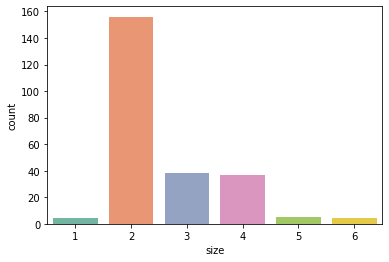

In [36]:
sns.countplot(data = tips, x = 'size')
plt.show()

1인~6인 테이블이 존재하지만, 2인 테이블이 가장 많은 것을 확인할 수 있습니다. 혼자 먹는 1인 테이블과 5인 이상의 테이블은 아주 희귀하군요. 5-6인 테이블은 팁을 많이 받겠지만, 많은 기회가 있진 않을 것이라 예상할 수 있습니다.

## 가설 : 테이블의 인원수를 나타내는 `size` 컬럼은 tip을 결정짓는 중요한 요소일 것이다

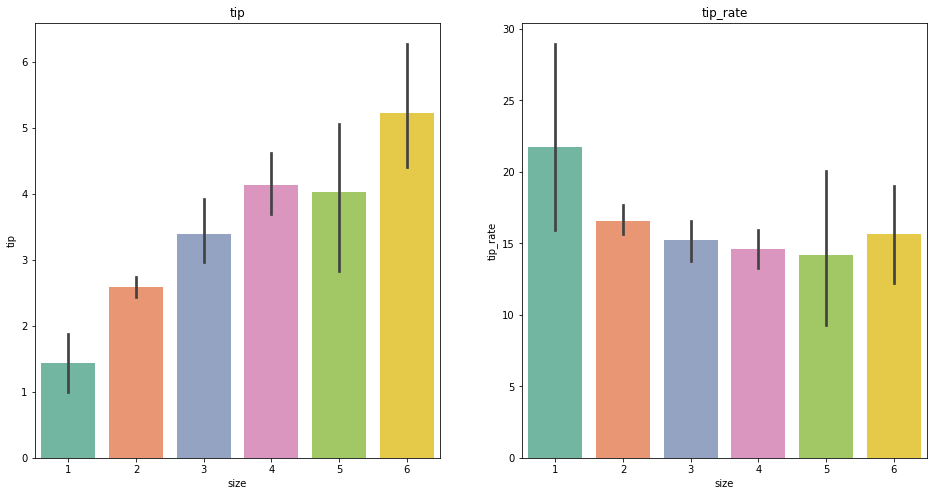

In [38]:
# size에 따른 tip, tip_rate 그래프 시각화 하기
plt.figure(figsize=(16, 8))

plt.subplot(121)
sns.barplot(data = tips, x = 'size', y = 'tip')
plt.title('tip')

plt.subplot(122)
sns.barplot(data = tips, x = 'size', y = 'tip_rate')
plt.title('tip_rate')

plt.show()

흠, 하지만 tip_rate를 살펴보았을 때는 size가 커질수록 팁을 주는 비율은 낮아지는 것이 확인됩니다.

혼자 온 손님의 경우 20% 이상의 팁을 많이 주는 반면, 5-6인 테이블에서는 약 15% 내외로만 주는군요.

비용이 높아질수록 tip의 절대적인 금액도 높아지므로 비율은 낮춰서 주는 것으로 파악됩니다.

total_bill과 tip_rate의 관계를 확인할 수 있는 그래프!

두 가지 데이터의 분포를 확인하고 싶은 경우, 점을 찍을 수 있는 산점도로 확인하면 편리합니다.
seaborn은 간단한 추세선을 `fit_reg`로 확인할 수 있습니다. 추세선은 기본적으로 다항식으로 표현되는데, `order` 인자로 차수를 결정할 수 있습니다.

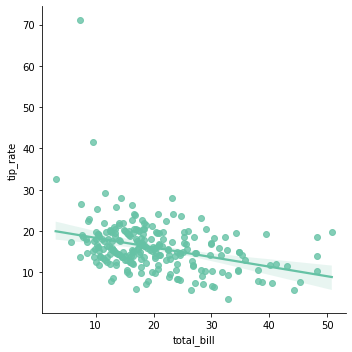

In [41]:
# order=1 인 경우 : 1차 함수
sns.lmplot(data = tips, x = "total_bill", y = 'tip_rate', fit_reg = True, order = 1)
plt.show()

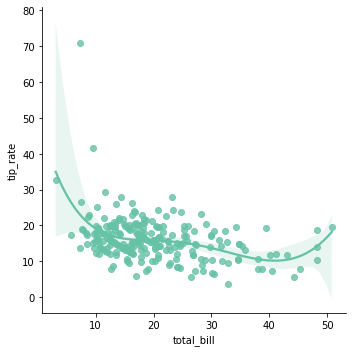

In [42]:
# order=2 인 경우: 2차 함수
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=5)
plt.show()

어떤가요? 같은 그래프이지만 추세선은 다르게 나타납니다.

당연한 이야기지만 차수가 낮다면 비교적 단순한 경향성을 알아볼 수 있고, 차수가 높다면 데이터에 보다 적합하면서도 복잡한 추세를 알아볼 수 있습니다.
그렇다면 복잡하고 정교하게 추세를 볼수록 항상 좋은걸까요? 한 번 생각해봅시다.

음, 차수를 너무 높게 잡아서 복잡한 추세를 보게되면, 그 주어진 데이터에만 맞는 아주 복잡한 선이 그려질 수 있습니다.

이 말은, 일반화하기에는 어렵다는 뜻이고, 그 결과 주어진 데이터가 아닌 새로운 데이터에 대해서는 맞지 않을수도 있다는 이야기가 되죠. 이 문제를 머신러닝에서는 과적합(overfitting) 이라고 합니다.

이상치(Outlier)를 살펴보자
위 그래프를 통해 total_bill과 tip_rate는 반비례하는 경향을 가지는 것을 확인할 수 있습니다.

또 한 가지 흥미로운 점은, 혼자서 엄청 떨어져 있는 특이한 tip_rate(70%이상, 40%이상) 가 있다는 점입니다. 이를 시각화를 통해 확인해보겠습니다.

이는 이상치(Outlier)로, 데이터를 다룰 때 혼자 너무 떨어져 있는 데이터의 경우 전체적인 경향성을 확인하는 데에 부정적인 영향을 줄 수 있으므로 주의해야 합니다.

아웃라이어를 확실히 확인하고 싶을 때에는 boxplot을 활용하면 편리합니다.

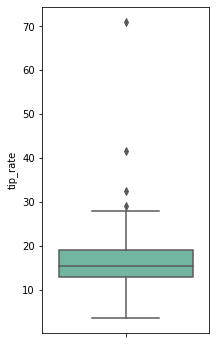

In [43]:
# 시각화로 이상치 확인해보기
plt.figure(figsize=(3,6))

sns.boxplot(data = tips, y = "tip_rate")
plt.show()